In [8]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import numpy as np
import pandas as pd

## Downloading the data from Kaggle .csv

In [9]:
data = pd.read_csv("/content/2019.csv")
data.head(10)


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


# Graphing
This section is a group of scatter plots showing the correlation between the Overall Score, which directly correlates to the happiness rank, and the other variables which helps determine the overall happiness score.

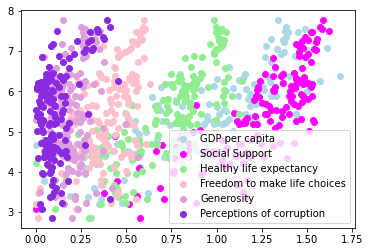

In [10]:
#Graphing
X1 = data['GDP per capita']
X2 = data['Social support']
X3 = data['Healthy life expectancy']
X4 = data ['Freedom to make life choices']
X5 = data ['Generosity']
X6 = data ['Perceptions of corruption']

y = data['Score']

plt.scatter(X1, y, c = 'lightblue', label= "GDP per capita")
plt.scatter(X2, y, c = 'magenta', label= "Social Support")
plt.scatter(X3, y, c = 'lightgreen', label = "Healthy life expectancy")
plt.scatter(X4, y, c = 'pink', label = "Freedom to make life choices")
plt.scatter(X5, y, c = 'plum', label = "Generosity")
plt.scatter(X6, y, c = 'blueviolet', label = "Perceptions of corruption")

plt.legend()

# Cleaning up the Data for computation
In this section I define my X and Y. X is a culmination of columns 4-9 which are the factors that help determine the happiness score, which is Y.

In [11]:
Parameters = ['GDP per capita', 'Social support', 'Healthy life expectancy','Freedom to make life choices', 
           'Generosity', 'Perceptions of corruption']


X = data[Parameters]
y = data['Score']
Regressionmodel = LinearRegression(fit_intercept=False)
Regressionmodel.fit(X, y)
data['Estimate'] = Regressionmodel.predict(X)

# Plotting Estimated Coefficient vs. Score
Here is the comparison of the calculated estimate above and the actual score. This is where I compare Y, the Happiness Score, to a weighted linear combination of the variables in X (GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption)

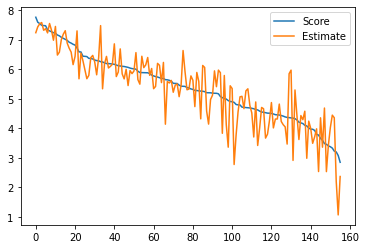

In [12]:
data[['Score', 'Estimate']].plot(alpha=1);


# Showing the Weight each Parameter 
This section shows the weight each parameter has in relation to computing the Happiness Score. This is ultimately what I was searching for and can be applicable for other countries wanting to boost their citizen's overall happiness. This is also applicable for people looking to move countries or states, determining the Overall Happiness of the community they might move to.

In [13]:
WeightOfParameters = pd.Series(Regressionmodel.coef_, index=X.columns)
WeightOfParameters

GDP per capita                  0.242116
Social support                  2.290587
Healthy life expectancy         1.664839
Freedom to make life choices    1.748913
Generosity                      1.991014
Perceptions of corruption       0.755061
dtype: float64

# Visualizing the impact of each parameter on the Overall Happiness

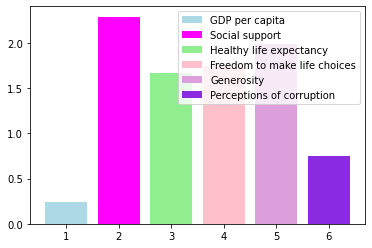

In [14]:
plt.bar(1, height = WeightOfParameters[0], color = 'lightblue', label = "GDP per capita")
plt.bar(2, height = WeightOfParameters[1], color = 'magenta', label = "Social support")
plt.bar(3, height = WeightOfParameters[2], color = 'lightgreen', label = "Healthy life expectancy")
plt.bar(4, height = WeightOfParameters[3], color = 'pink', label = "Freedom to make life choices")
plt.bar(5, height = WeightOfParameters[4], color = 'plum', label = "Generosity")
plt.bar(6, height = WeightOfParameters[5], color = 'blueviolet', label = "Perceptions of corruption")
plt.legend()

# Using found Coefficients to predict Happiness Rank
How?

# Conclusion
From the graph above you can see that the most important factors on the Overall Happiness Score are Social support, Generosity, Freedom to make life choices rather than GDP per capita or perception of corruption.